In [72]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import os
import numpy as np

file='runComparison.csv'

In [87]:
# # Beryllium
TotalEnergy = -1.4446201118081863e+01
# TotalEnergy = -14.446194361313 # pc-4
ExchangeEnergy = -2.2903921833555341e+00
CorrelationEnergy = -2.2343205529440757e-01
BandEnergy = -8.1232305760491457e+00
KineticEnergy =  1.4309060170370618e+01
ElectrostaticEnergy = -8.1232305760491457e+00
# HartreeEnergy = 7.115165052  
HartreeEnergy = 7.115210167512  # pc-4

# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/compareSingularitySubtractionBeryllium/'
# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/pRefinement/'
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/hRefinement/'
df = pd.read_csv(resultsDir+file, header=0)
df;


In [88]:
## Fill error arrays

df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
try: 
    df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')
    
df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
try: 
    df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


In [95]:
## Plotting functions

def AversusB(df,A,B,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('%s versus %s' %(A,B))
    df.plot(x=B, y=A, style='o',ax=ax)

    dftfeEnergy = -1.1376237062839634e+00
    NWchemEnergy = -1.1372499
    plt.axhline(y=dftfeEnergy,color='r')
    plt.axhline(y=NWchemEnergy,color='g')
##    plt.plot(dftfeEnergy*np.ones(100),'r-')
##    plt.plot(NWchemEnergy*np.ones(100),'g-')
    if save == True:
        saveID = A+'Vs'+B
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def AversusBcolorbyC(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby(C)
    for name,group in grouped:
##        group.plot(x=B, y=A, style='o', ax=ax, label='%s = %.2f'%(C,name))
        group.plot(x=B, y=A, style='o', ax=ax, label='%s = %s'%(C,name))
    plt.legend(loc = 'best')

    if save == True:
        saveID = A+'Vs'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def logAversusBcolorbyC(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('Log %s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby(C)
    for name,group in grouped:
#         group['logA'] = np.log10(np.abs(group[A]))
        group.plot(x=B, y=A, logy=True, style='o', ax=ax, label='%s = %.2f'%(C,name))
##        group.plot(x=B, y='logA', style='o', ax=ax, label='%s = %s'%(C,name))
    plt.legend(loc = 'best')
    plt.xlabel(B)
    plt.ylabel(A)
#     plt.ylim([1e-3,1e-2])
    plt.grid()

    if save == True:
        saveID = 'log'+A+'Vs'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()
    
def logAversusB(df,A,B,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('Log %s versus %s' %(A,B))
    df.plot(x=B, y="absTotalEnergyError", logy=True, style='o', ax=ax, label="Total Energy")
    df.plot(x=B, y="absBandEnergyError", logy=True, style='o', ax=ax, label="Band Energy")
    df.plot(x=B, y="absHartreeEnergyError", logy=True, style='o', ax=ax, label="Hartree Energy")
    plt.legend()
    plt.xlabel(B)
    plt.ylabel(A)
#     plt.ylim([1e-3,1e-2])
    plt.grid()

    if save == True:
        saveID = 'log'+A+'Vs'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def logAversusLogBcolorbyC(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby(C)
    for name,group in grouped:
##        group['logA'] = np.log10(np.abs(group[A]))
##        group['logB'] = np.log10(np.abs(group[B]))
        if isinstance(name,str):
##            group.plot(x='logB', y='logA', style='o', ax=ax, label='%s = %s'%(C,name))
            group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %i'%(C,name))
        
    plt.legend(loc = 'best')
    plt.xlabel(B)
    plt.ylabel(A)
#     plt.xlim([3e5,2e6])
#     plt.ylim([5e-5,1e-2])
    plt.grid()
    
    if save == True:
        saveID = 'log'+A+'VsLog'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()
    
def hRefinement(df,save=False):
    df = df.sort_values(by='numberOfPoints')
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby('order')
    for name,group in grouped:
#         group.plot(x='numberOfPoints', y='absTotalEnergyError', style='o-', ax=ax, loglog=True,label='Cell Order = %i'%(name))
#         group.plot(x='numberOfCells', y='absTotalEnergyError', style='o-', ax=ax, loglog=True,label='Cell Order = %i'%(name))
#         group.plot(x='numberOfPoints', y='absBandEnergyError', style='*-', ax=ax, loglog=True,label='Cell Order = %i'%(name))
        group.plot(x='numberOfPoints', y='absHartreeEnergyError', style='^-', ax=ax, loglog=True,label='Cell Order = %i'%(name))
        
    plt.legend(loc = 'best')
    plt.xlabel('Mesh Size')
    plt.ylabel('Energy Errors')
#     plt.xlim([3e5,2e6])
#     plt.ylim([5e-5,1e-2])
    plt.grid()
    
    if save == True:
        saveID = 'log'+A+'VsLog'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()


<IPython.core.display.Javascript object>


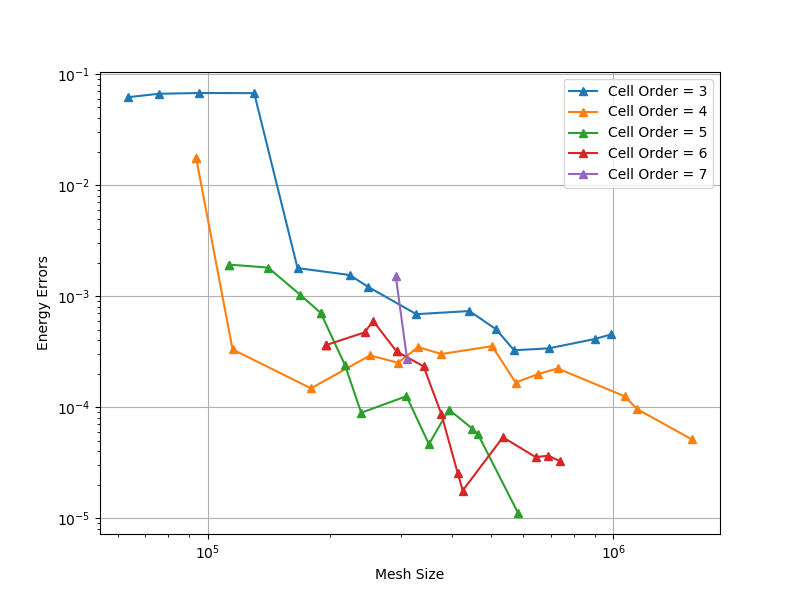

In [96]:
# logAversusLogBcolorbyC(df,'absTotalEnergyError', 'numberOfPoints', 'order')
# logAversusB(df,'absTotalEnergyError', 'order')
# logAversusB(df,'absTotalEnergyError', 'numberOfPoints')

hRefinement(df)